# Supervised Learning ASA

## Regression Model with Xgboost

### Case BVR 1x1

#### START 

* Main Tactic = COMMIT

* Event to establish the Initial State (X)

#### END

* Main Tactic = ABORT or BREAK

* Event to establish the Final State (Y)

#### Search for all events COMMIT -> ABORT or BREAK
* Get initial state (X) and final state (Y)
* Composition of a large array of data
* ML application for "learning"
* Establishment of a model Y = F(X)

### LHD

* Fixed CAPs: Vary starting positions around the CAPs
* Flight levels
* SHOT PHIs
* Commit Distance
* Thresholds Bef/Aft
* Shot Distance
* RWR
* 3729 executions (10316 samples)

### Features
    
* distance: Distance in meters between aircraft
* aspect: Aspect angle
* delta_heading: Variation of heading angle
* delta_altitude: Altitude variation
* delta_velocity: Absolute velocity variation
* wez_max_own2trk: WEZ MAX Own to Track
* wez_nez_own2trk: WEZ NEZ Own to Track
* wez_max_trk2own: Estimated WEZ MAX Track to Own
* wez_nez_trk2own: Estimated WEZ NEZ Track to Own

* vul_thr_bef_shot: Threshold before shot
* vul_thr_aft_shot: Threshold after shot
* shot_point: Missile firing point
* rwr_aircraft_warning: RWR warning by aircraft
* hp_tgt_ofensivity: Offensiveness index
* hp_thr_vulnerability: Vulnerability Index
* own_shot_phi: Own shooting philosophy
* enemy_shot_phi: Estimated opponent's shooting philosophy

### Target

* air_superiority_index: Average air superiority index between a commit and an abort or break

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_20-07-2020.csv')
df['dca_index'] = df['air_superiority_index']
df.drop('air_superiority_index', axis=1, inplace=True)

In [3]:
# id_batch = 374 with 3729 executions
print('samples: ',len(df))

samples:  10316


## Exploratory Data Analysis



























































In [4]:
df['dca_index'].describe()

count    10316.000000
mean         0.530613
std          0.120260
min          0.211739
25%          0.456619
50%          0.511875
75%          0.587493
max          0.991994
Name: dca_index, dtype: float64

In [5]:
df.drop('rwr_aircraft_warning',axis=1).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
distance,10316.0,54676.38,25828.54,3564.59,32071.24,46653.23,83989.56,92556.43
aspect,10316.0,151.04,17.97,65.57,136.76,151.02,167.03,180.00
delta_heading,10316.0,106.68,50.50,0.03,68.27,116.80,149.11,179.99
delta_altitude,10316.0,62.33,1428.17,-3231.94,-918.85,7.12,1073.14,3583.40
delta_velocity,10316.0,0.21,7.34,-49.47,-2.25,0.04,2.02,52.53
wez_max_own2trk,10316.0,24.04,10.90,-1.00,12.35,27.34,34.00,40.11
wez_nez_own2trk,10316.0,8.22,1.45,-1.00,7.33,8.36,9.19,12.44
wez_max_trk2own,10316.0,20.37,15.41,-1.00,-1.00,27.31,33.43,41.06
wez_nez_trk2own,10316.0,5.56,4.64,-1.00,-1.00,7.95,9.10,12.57
vul_thr_bef_shot,10316.0,0.49,0.32,0.00,0.18,0.48,0.79,1.00


/home/jovyan/work/envs/asa/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jovyan/work/envs/asa/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


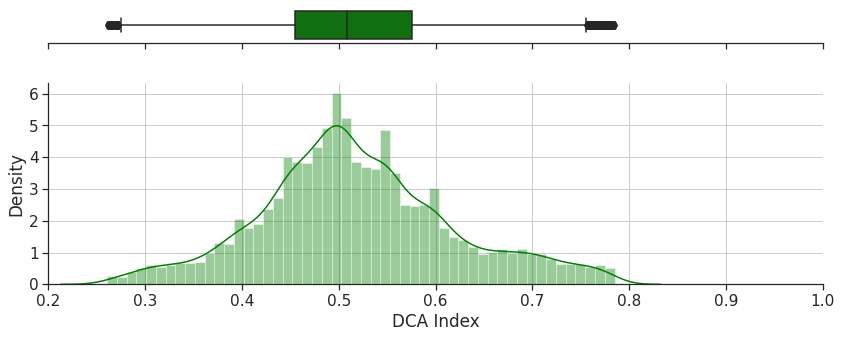

In [7]:
df = df[(df['dca_index'] < 0.785) & (df['dca_index']>0.26)]
sns.set(style="ticks",font_scale=1.4)


x = df['dca_index']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},figsize=(12,5))
sns.boxplot(x, ax=ax_box, color='green' )
sns.distplot(x, ax=ax_hist, bins=52, color='green')
plt.xlabel('DCA Index')
#plt.axvline(x=0.26, color='r', linestyle='--', linewidth=3, label='Inferior Threshold Value')
#plt.axvline(x=0.785, color='b', linestyle='--', linewidth=3, label='Superior Threshold Value')
#plt.legend()
plt.ylabel('Density')
plt.grid ()
plt.xlim (0.2,1)
#plt.ylim (0,0.09)
plt.tight_layout()
sns.set(font="serif")
ax_box.set(yticks=[], xlabel = None)
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [8]:
import pandas as pd
from sklearn import preprocessing

x = df['dca_index'].values.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['dca_index'] = pd.DataFrame(x_scaled)

### Normalizing the output

/home/jovyan/work/envs/asa/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jovyan/work/envs/asa/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


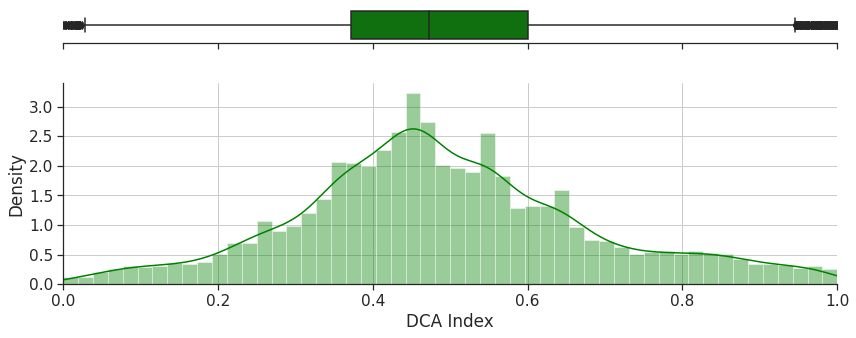

In [25]:
sns.set(style="ticks",font_scale=1.4)


x = df['dca_index']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},figsize=(12,5))
sns.boxplot(x, ax=ax_box, color='green' )
sns.distplot(x, ax=ax_hist, bins=52, color='green')
plt.xlabel('DCA Index')
#plt.axvline(x=0.26, color='r', linestyle='--', linewidth=3, label='Inferior Threshold Value')
#plt.axvline(x=0.785, color='b', linestyle='--', linewidth=3, label='Superior Threshold Value')
#plt.legend()
plt.ylabel('Density')
plt.grid ()
plt.xlim (0,1)
#plt.ylim (0,0.09)
plt.tight_layout()
sns.set(font="serif")
ax_box.set(yticks=[], xlabel = None)
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True)
df

,distance,aspect,delta_heading,delta_altitude,delta_velocity,own_shot_phi,enemy_shot_phi,wez_max_own2trk,wez_nez_own2trk,wez_max_trk2own,wez_nez_trk2own,vul_thr_bef_shot,vul_thr_aft_shot,shot_point,rwr_aircraft_warning,hp_tgt_ofensivity,hp_thr_vulnerability,dca_index
0,87597.401454,156.659122,134.262134,1981.240840,-0.577486,short,short,35.762241,9.383960,31.925061,8.654041,0.675140,0.704456,0.348105,0.0,0.004381,0.004381,0.627679
1,88638.600816,156.580036,133.242155,-1979.063686,0.594680,short,long,31.882673,8.676122,35.587813,9.354046,0.698301,0.426036,0.502600,0.0,0.006144,0.006144,0.646715
2,88892.829708,150.982223,83.477963,-606.720943,-0.066980,long,medium,19.331238,7.777890,29.767125,7.508884,0.577344,0.015621,0.941965,0.0,0.003989,0.003989,0.115633
3,88441.224917,155.621190,111.293288,151.014463,3.072693,medium,long,28.309615,8.260176,31.454548,8.669155,0.954911,0.445172,0.256272,0.0,0.005535,0.005535,0.332373
4,35822.060007,165.901209,47.757196,143.428417,7.848019,medium,long,10.170417,7.964732,-1.000000,-1.000000,0.954911,0.445172,0.256272,0.0,0.006054,0.000000,0.522806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,30734.453675,179.040462,33.188695,-223.458862,-17.099398,short,long,7.398858,6.527613,-1.000000,-1.000000,0.162927,0.055983,0.063345,0.0,0.006331,0.000000,0.674485
9826,72346.427927,130.523076,60.610186,2.323086,-0.028185,long,long,16.433046,6.061779,22.195293,5.196923,0.051978,0.042552,0.854345,0.0,0.004681,0.004681,0.298276
9827,16658.724021,134.425564,151.539888,-26.439097,0.115436,long,long,28.049797,7.049873,21.818230,7.000619,0.051978,0.042552,0.854345,0.0,0.970705,0.958764,0.478450
9828,69067.064285,144.954036,25.565549,1409.924388,-0.391399,long,long,9.548427,6.642626,-1.000000,-1.000000,0.387971,0.973846,0.554227,0.0,0.005659,0.000000,0.323546


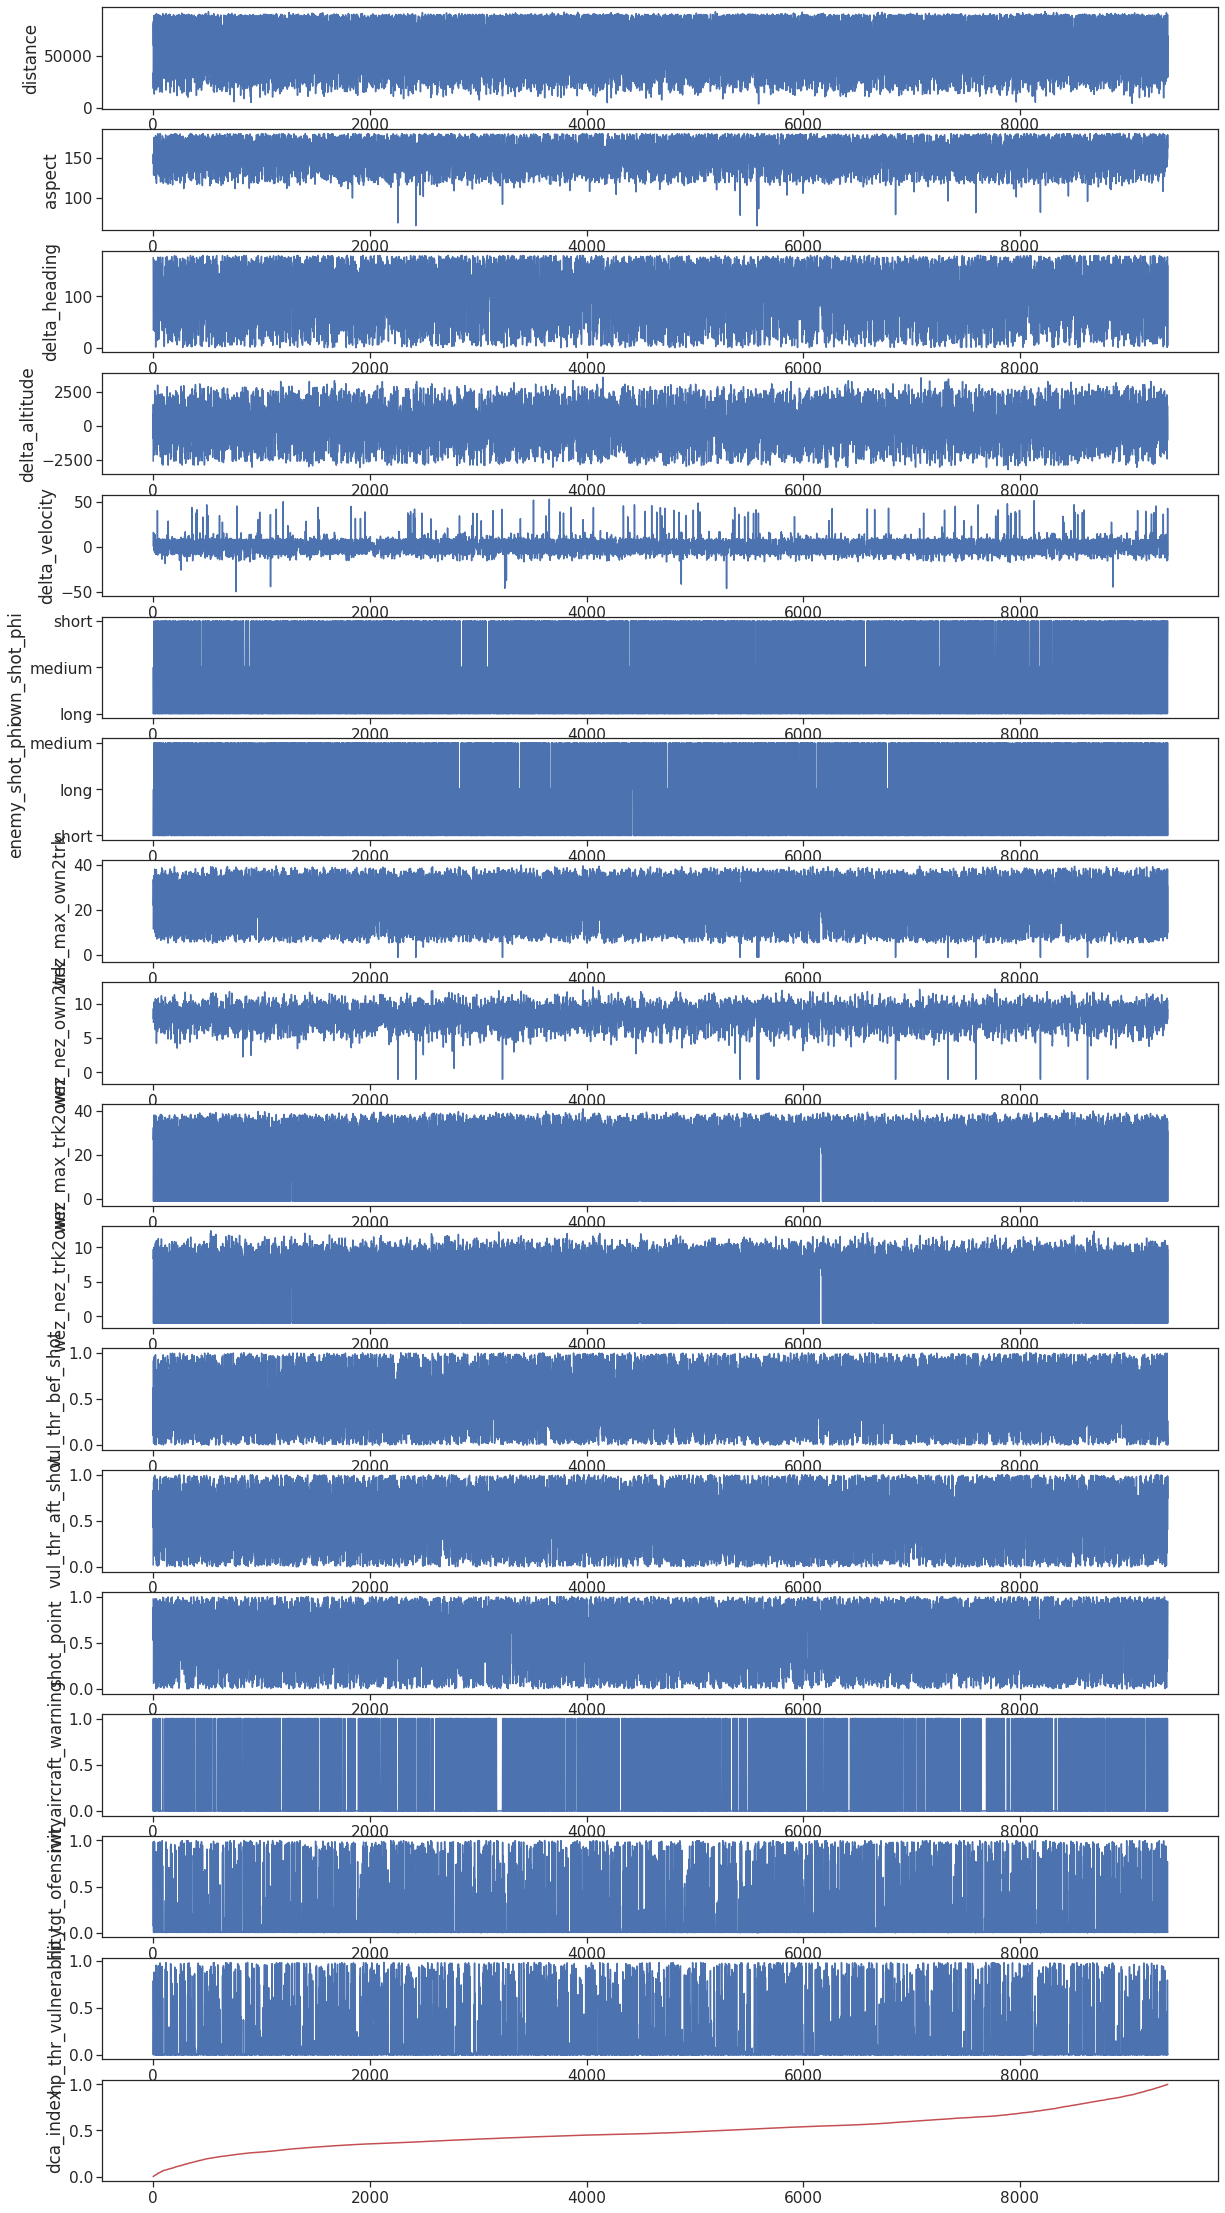

In [11]:
sns.set(style="ticks",font_scale=1.4)


y = df.loc[:,df.columns].sort_values('dca_index', ascending=True).values
x = np.arange(y.shape[0])

plt.figure(figsize=(20,40))
for i in range(df.shape[1]):
    if df.columns[i] == 'dca_index':
        plt.subplot(df.shape[1],1,i+1)
        plt.plot(x,y[:,i],'r')
        plt.ylabel(df.columns[i])            
    else:   
        plt.subplot(df.shape[1],1,i+1)
        plt.plot(x,y[:,i])
        plt.ylabel(df.columns[i])

In [12]:
# Análise estástica descritiva
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance,9365.0,53356.648081,25650.083842,3564.592635,31527.120418,44630.572612,83425.279985,92556.432694
aspect,9365.0,151.550598,17.671452,65.567403,137.522485,151.586121,167.199819,179.995781
delta_heading,9365.0,105.751194,51.160540,0.033633,65.435121,115.085506,149.642252,179.988045
delta_altitude,9365.0,64.601081,1413.841305,-3231.936186,-920.538715,12.936034,1073.151189,3583.398558
delta_velocity,9365.0,0.508800,7.045764,-49.394760,-1.522628,0.092500,2.496516,52.534921
wez_max_own2trk,9365.0,23.632521,10.931114,-1.000000,11.817261,26.380676,33.873904,40.068951
wez_nez_own2trk,9365.0,8.209121,1.438129,-1.000000,7.314217,8.330846,9.185445,12.437923
wez_max_trk2own,9365.0,19.987422,15.611373,-1.000000,-1.000000,27.211742,33.411786,40.865382
wez_nez_trk2own,9365.0,5.404681,4.680967,-1.000000,-1.000000,7.861164,9.075496,12.403808
vul_thr_bef_shot,9365.0,0.486314,0.318501,0.000087,0.185855,0.478787,0.788116,0.999742


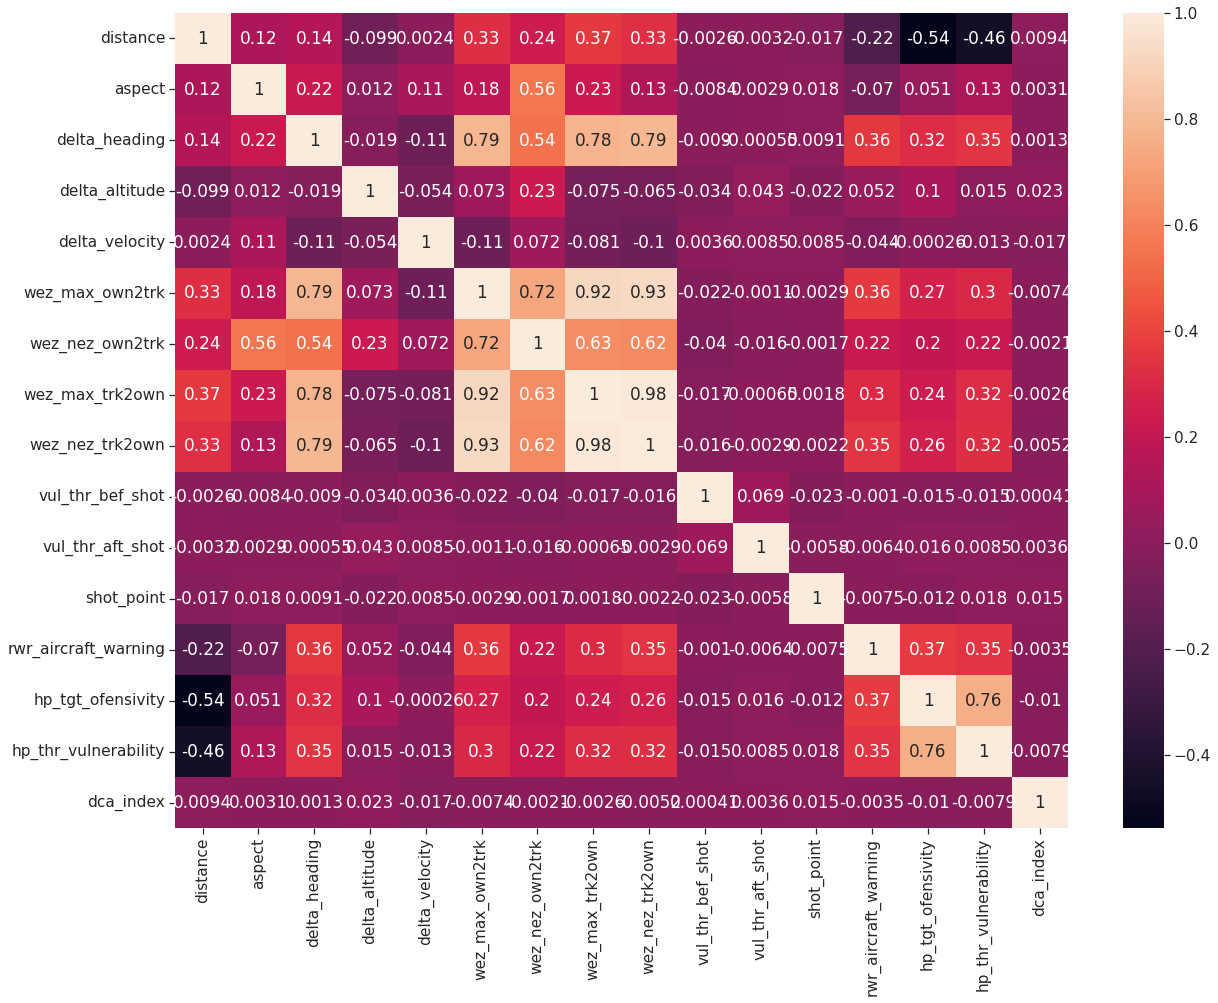

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.ylim(16, 0);


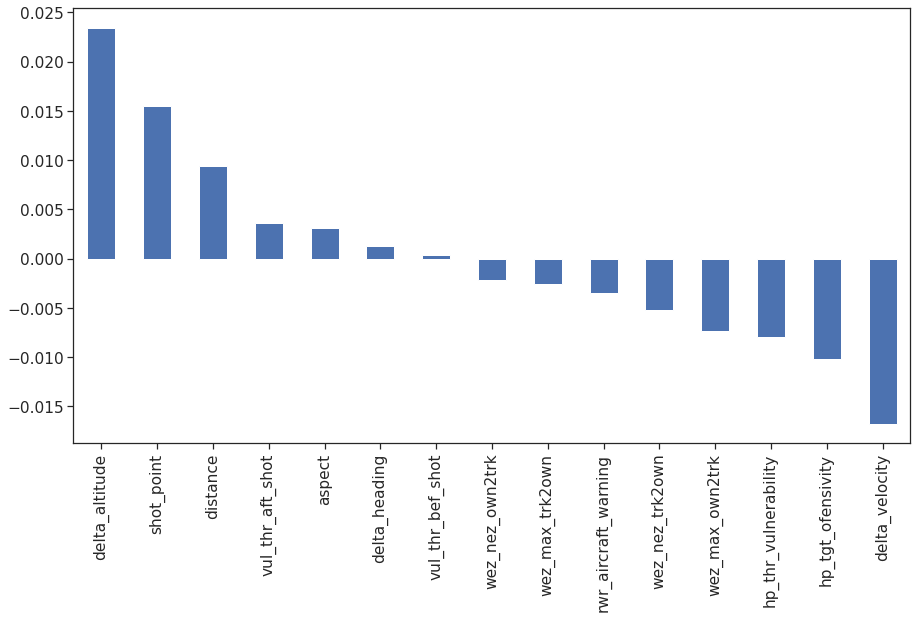

In [14]:
plt.figure(figsize=(15,8))
df.corr()['dca_index'].sort_values(ascending=False)[1:].plot(kind='bar');

In [15]:
def categorical(x):
    if x <= 0.33:
        return '<0.33'
    elif 0.33<x<=0.66:
        return '0.33-0.66'
    else:
        return '>0.66'
    
df2 = df.copy()

df2['dca_index'] = df2['dca_index'].apply(categorical)

In [16]:
order = ['<0.33','0.33-0.66','>0.66']

In [17]:
df.columns

Index(['distance', 'aspect', 'delta_heading', 'delta_altitude',
       'delta_velocity', 'own_shot_phi', 'enemy_shot_phi', 'wez_max_own2trk',
       'wez_nez_own2trk', 'wez_max_trk2own', 'wez_nez_trk2own',
       'vul_thr_bef_shot', 'vul_thr_aft_shot', 'shot_point',
       'rwr_aircraft_warning', 'hp_tgt_ofensivity', 'hp_thr_vulnerability',
       'dca_index'],
      dtype='object')

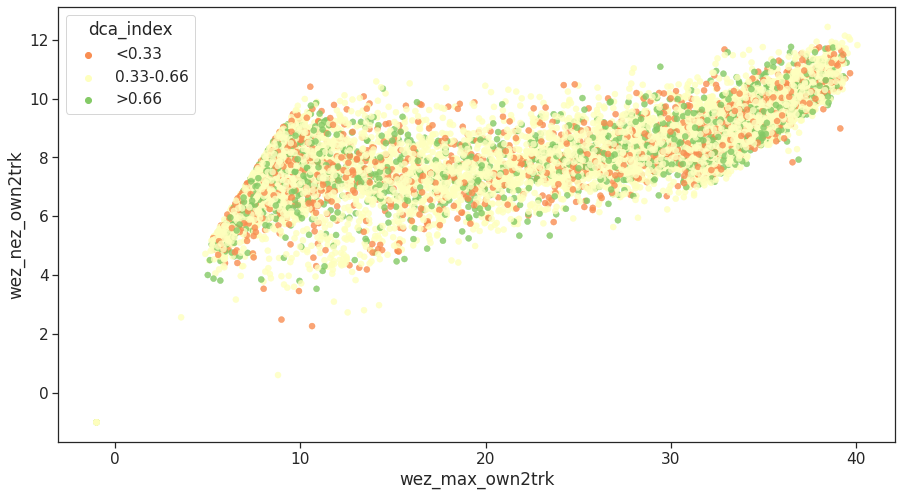

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='wez_max_own2trk',y='wez_nez_own2trk',
                data=df2,hue='dca_index',
                palette='RdYlGn',edgecolor=None,alpha=0.8,hue_order = order);

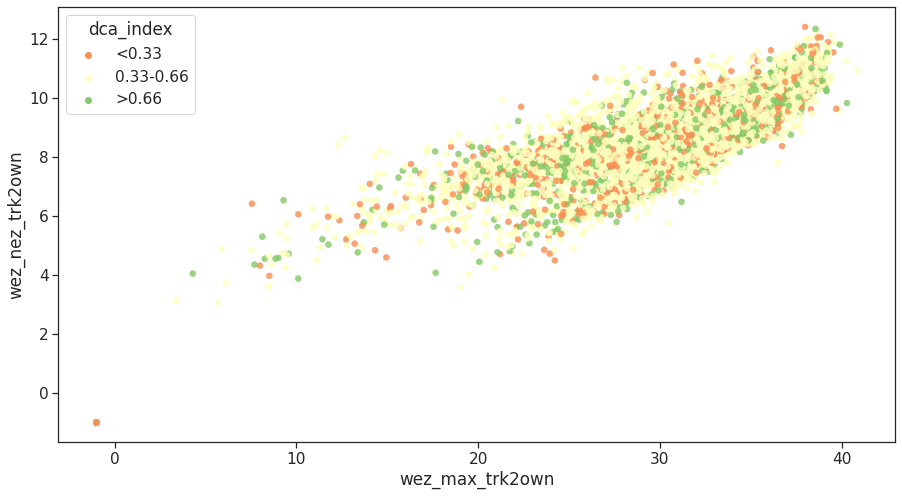

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='wez_max_trk2own',y='wez_nez_trk2own',
                data=df2,hue='dca_index',
                palette='RdYlGn',edgecolor=None,alpha=0.8,hue_order = order);

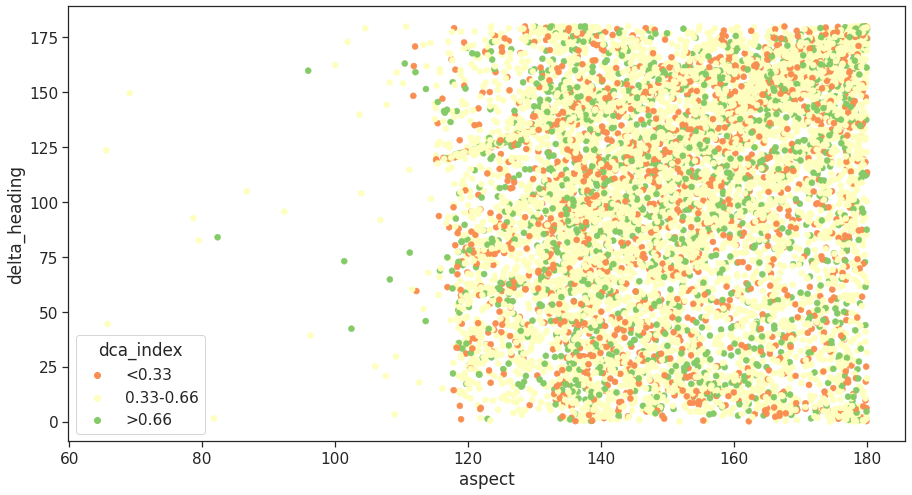

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='aspect',y='delta_heading',
                data=df2,hue='dca_index', edgecolor=None ,alpha=1,
                hue_order = order,palette='RdYlGn');

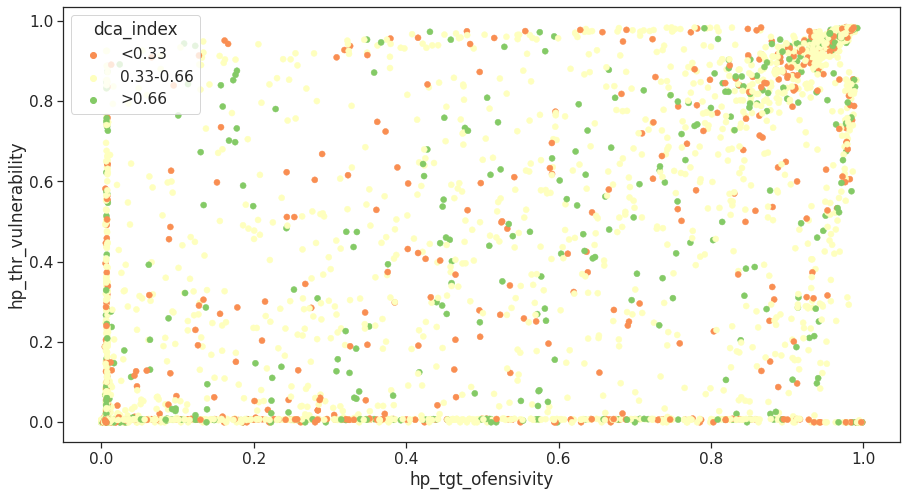

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='hp_tgt_ofensivity',y='hp_thr_vulnerability',
                data=df2,hue='dca_index', edgecolor=None ,alpha=1,
                hue_order = order,palette='RdYlGn');

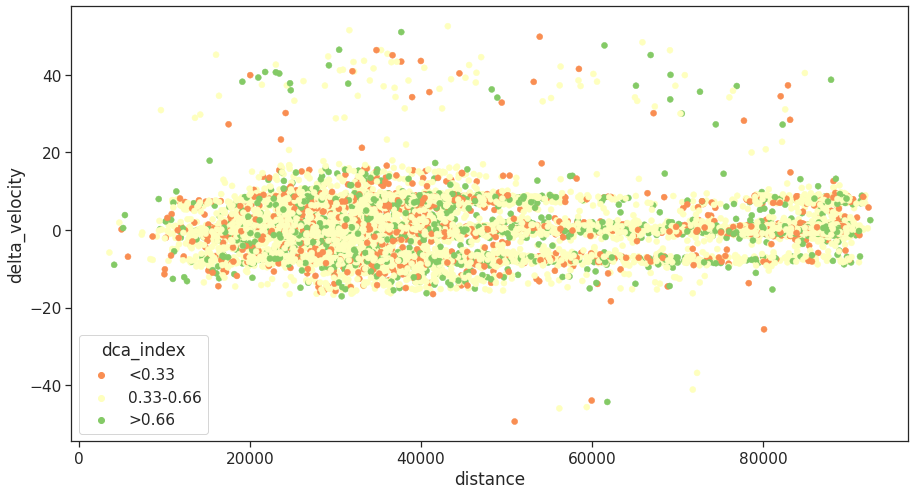

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='distance',y='delta_velocity',
                data=df2,hue='dca_index', edgecolor=None ,alpha=1,
                hue_order = order,palette='RdYlGn');

## Label Enconder and One Hot Enconder

In [26]:
df.head(8).T

,0,1,2,3,4,5,6,7
distance,87597.401454,88638.600816,88892.829708,88441.224917,35822.060007,88626.532942,23026.165892,39335.73966
aspect,156.659122,156.580036,150.982223,155.62119,165.901209,135.46029,165.952325,142.019394
delta_heading,134.262134,133.242155,83.477963,111.293288,47.757196,110.812003,179.09167,44.839047
delta_altitude,1981.24084,-1979.063686,-606.720943,151.014463,143.428417,-151.146289,-262.828712,-655.677321
delta_velocity,-0.577486,0.59468,-0.06698,3.072693,7.848019,-2.871127,1.991757,1.760672
own_shot_phi,short,short,long,medium,medium,long,long,medium
enemy_shot_phi,short,long,medium,long,long,short,short,medium
wez_max_own2trk,35.762241,31.882673,19.331238,28.309615,10.170417,31.318844,32.939244,6.837101
wez_nez_own2trk,9.38396,8.676122,7.77789,8.260176,7.964732,8.656973,8.729773,5.837101
wez_max_trk2own,31.925061,35.587813,29.767125,31.454548,-1.0,28.594915,34.027971,-1.0


In [27]:
# using pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['own_shot_phi'], prefix='own_shot_phi')],axis=1)

# now drop the original 'own_shot_phi' column (you don't need it anymore)
df.drop(['own_shot_phi'],axis=1, inplace=True)

# using pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['enemy_shot_phi'], prefix='enemy_shot_phi')],axis=1)

# now drop the original 'enemy_shot_phi' column (you don't need it anymore)
df.drop(['enemy_shot_phi'],axis=1, inplace=True)

# fixing the order to make 'dca_index' to be the last one
df = pd.concat([df.drop(['dca_index'],axis=1),df['dca_index']],axis=1)

df


,distance,aspect,delta_heading,delta_altitude,delta_velocity,wez_max_own2trk,wez_nez_own2trk,wez_max_trk2own,wez_nez_trk2own,vul_thr_bef_shot,...,rwr_aircraft_warning,hp_tgt_ofensivity,hp_thr_vulnerability,own_shot_phi_long,own_shot_phi_medium,own_shot_phi_short,enemy_shot_phi_long,enemy_shot_phi_medium,enemy_shot_phi_short,dca_index
0,87597.401454,156.659122,134.262134,1981.240840,-0.577486,35.762241,9.383960,31.925061,8.654041,0.675140,...,0.0,0.004381,0.004381,0,0,1,0,0,1,0.627679
1,88638.600816,156.580036,133.242155,-1979.063686,0.594680,31.882673,8.676122,35.587813,9.354046,0.698301,...,0.0,0.006144,0.006144,0,0,1,1,0,0,0.646715
2,88892.829708,150.982223,83.477963,-606.720943,-0.066980,19.331238,7.777890,29.767125,7.508884,0.577344,...,0.0,0.003989,0.003989,1,0,0,0,1,0,0.115633
3,88441.224917,155.621190,111.293288,151.014463,3.072693,28.309615,8.260176,31.454548,8.669155,0.954911,...,0.0,0.005535,0.005535,0,1,0,1,0,0,0.332373
4,35822.060007,165.901209,47.757196,143.428417,7.848019,10.170417,7.964732,-1.000000,-1.000000,0.954911,...,0.0,0.006054,0.000000,0,1,0,1,0,0,0.522806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,30734.453675,179.040462,33.188695,-223.458862,-17.099398,7.398858,6.527613,-1.000000,-1.000000,0.162927,...,0.0,0.006331,0.000000,0,0,1,1,0,0,0.674485
9826,72346.427927,130.523076,60.610186,2.323086,-0.028185,16.433046,6.061779,22.195293,5.196923,0.051978,...,0.0,0.004681,0.004681,1,0,0,1,0,0,0.298276
9827,16658.724021,134.425564,151.539888,-26.439097,0.115436,28.049797,7.049873,21.818230,7.000619,0.051978,...,0.0,0.970705,0.958764,1,0,0,1,0,0,0.478450
9828,69067.064285,144.954036,25.565549,1409.924388,-0.391399,9.548427,6.642626,-1.000000,-1.000000,0.387971,...,0.0,0.005659,0.000000,1,0,0,1,0,0,0.323546


In [28]:
df.head(8).transpose()

,0,1,2,3,4,5,6,7
distance,87597.401454,88638.600816,88892.829708,88441.224917,35822.060007,88626.532942,23026.165892,39335.739660
aspect,156.659122,156.580036,150.982223,155.621190,165.901209,135.460290,165.952325,142.019394
delta_heading,134.262134,133.242155,83.477963,111.293288,47.757196,110.812003,179.091670,44.839047
delta_altitude,1981.240840,-1979.063686,-606.720943,151.014463,143.428417,-151.146289,-262.828712,-655.677321
delta_velocity,-0.577486,0.594680,-0.066980,3.072693,7.848019,-2.871127,1.991757,1.760672
wez_max_own2trk,35.762241,31.882673,19.331238,28.309615,10.170417,31.318844,32.939244,6.837101
wez_nez_own2trk,9.383960,8.676122,7.777890,8.260176,7.964732,8.656973,8.729773,5.837101
wez_max_trk2own,31.925061,35.587813,29.767125,31.454548,-1.000000,28.594915,34.027971,-1.000000
wez_nez_trk2own,8.654041,9.354046,7.508884,8.669155,-1.000000,8.256374,9.016151,-1.000000
vul_thr_bef_shot,0.675140,0.698301,0.577344,0.954911,0.954911,0.741188,0.741188,0.761117
